In [149]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df=pd.read_excel('ames_housing_data.xlsx')

for i in df.columns:
    print(i)

SID
PID
SubClass
Zoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodel
RoofStyle
RoofMat
Exterior1
Exterior2
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
FirstFlrSF
SecondFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
ThreeSsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [128]:
### Adding in code to clean the data.
import seaborn as sns
import matplotlib.pyplot as plt


## 
sns.set()
# fig, (ax1, ax2) = plt.subplots(1,2,figsize=(25, 12))

df_heat1=df.sort_index(axis=1, ascending=False)
# sns.heatmap(df_heat1.T.isnull(), ax=ax1, cbar=False).invert_yaxis()
# ax1.hlines(range(len(df_heat1)), *ax1.get_xlim(), color='white', linewidths=1)
# ax1.vlines([], [], [])
# ax1.set_title('Heatmap of Missing Values Before Cleaning')
# plt.yticks(rotation = 360)
df['TotalFloorSF'] = df['FirstFlrSF'] + df['SecondFlrSF']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['QualityIndex'] = df['OverallQual'] * df['OverallCond']
df['logSalePrice'] = np.log(df['SalePrice'])
df['price_sqft'] = df['SalePrice'] / df['TotalFloorSF']
Nulls=[]
for i in df.columns:
    if df[i].isnull().sum() > 0:
        Nulls.append(i)
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())           
df['Alley']=df['Alley'].fillna('No alley')
df['MasVnrType']=df['MasVnrType'].fillna('None')
df['MasVnrArea']=df['MasVnrArea'].fillna(0)
df['RemodelAge']=df['YrSold']-df['YearRemodel']
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col].fillna('No basement')
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    if df[col].dtype == 'object':
        df[col]=df[col].fillna('No garage')
    else:
        df[col]=df[col].fillna('None')
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['GarageCars']=df['GarageCars'].fillna(0)
df['GarageArea']=df['GarageArea'].fillna(0)
df['PoolQC']=df['PoolQC'].fillna('No pool')
df['Fence']=df['Fence'].fillna('No fence')
df['MiscFeature']=df['MiscFeature'].fillna('No feature')
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna('No fireplace')
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col]=df[col].fillna('No basement')
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    df[col]=df[col].fillna(0)
df.to_csv('ames_housing_data.csv', index=False)
# sns.set()
df_heat2=df.sort_index(axis=1, ascending=False)
# sns.heatmap(df_heat2.T.isnull(), ax=ax2, cbar=False).invert_yaxis()
# ax2.hlines(range(len(df_heat2)), *ax2.get_xlim(), color='white', linewidths=1)
# ax2.set_title('Heatmap of Missing Values After Cleaning')
# ax2.vlines([], [], [])
# plt.yticks(rotation = 360)
# plt.show()

# Task 1

Choosing the best variable is slightly complicated due to the apples and oranges nature of testing numeric variabes against oridinal variables. Based on the pearson values, TotalFloorSF has the highest correlation of all of the numeric variables. However, OverallQual has a higher spearman coefficent but it is not a continous variable.

In [129]:
from sklearn.linear_model import LinearRegression as LR
import statsmodels.api as sm
from scipy import stats

X=np.array(df['TotalFloorSF']).reshape(-1, 1)
y=np.array(df['SalePrice']).reshape(-1, 1)

model1=LR()
model1.fit(X, y)
model1.score(X, y)

y_pred = model1.predict(X)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print('Model 1 Summary')
print(est2.summary())

Model 1 Summary
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     3038.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:45:00   Log-Likelihood:                -36189.
No. Observations:                2930   AIC:                         7.238e+04
Df Residuals:                    2928   BIC:                         7.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.141e+04   3242.598    

## a)

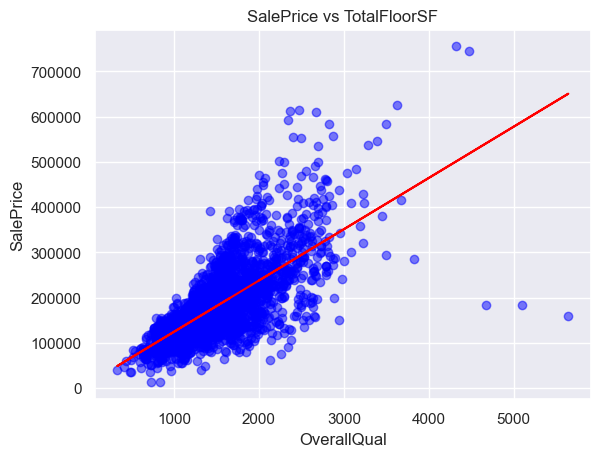

In [130]:
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_pred, color='red')
plt.title('SalePrice vs TotalFloorSF')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

In [131]:
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(est2)
test_class_betas=test_class.dfbetas[:5,:]

## b)

The regression model can be written as: $$SalePrice = 11406.478 + 113.303*TotalFloorSF$$

or 

$$\hat{Y} = 11406.478 + 113.303*X$$

 This implies that when the TotalFloorSF is zero, the predicted SalePrice is approximately 11406.478 USD (constant term). The coefficient for TotalFloorSF is 113.303, meaning that for each additional square foot of floor space, the sale price of the property increases by approximately 113.303 USD, on average, while holding all other variables constant.

## c)

The R-squared value of the model is 0.509. This means that approximately 50.9% of the variation in SalePrice is explained by TotalFloorSF in this model. Given that we are working with housing prices which can be influenced by many factors, an R-squared of 0.509 indicates that TotalFloorSF captures a significant amount of the variation in housing prices, but a large amount is still unexplained.

## d)
The coefficients and standard errors are already given in the OLS Regression Results. Here are the ANOVA table results:

| |sum_sq|df|F|PR(>F)|
|:----:|:----:|:----:|:----:|:----:|
|TotalFloorSF |9.52E+12|1|3037.862919|0|
|Residual|9.17E+12|2928|NaN|NaN|

The F-statistic for the model is 3037.86 and the associated p-value is nearly 0. This suggests that the model as a whole is statistically significant.

## e)
Hypothesis Tests for individual coefficent:

Null Hypothesis (H0): The slope (coefficient of TotalFloorSF) is equal to zero. This suggests that there is no relationship between TotalFloorSF and SalePrice. Written as:

$$H0: β1 = 0$$

Alternative Hypothesis (H1): The slope (coeterm-3ficient of TotalFloorSF) is not equal to zero. This suggests that there is a relationship between TotalFloorSF and SalePrice. Written as:

$$H1: β1 ≠ 0$$

Hypothesis Tests for omnibus model:

Null Hypothesis (H0): The model with no predictors (intercept-only model) is as good at explaining the variance in SalePrice. Written as (summarized):

$$H0: β1 = β2 = ... = βk = 0$$

Alternative Hypothesis (H1): The model with the predictor (TotalFloorSF) is significantly better at explaining the variance in SalePrice. Written as:
$$H1: At least one β does not equal 0$$



The null hypothesis for the coefficient of TotalFloorSF is that the coefficient is equal to zero, which would suggest that TotalFloorSF has no effect on SalePrice. The alternative hypothesis is that the coefficient is not zero, meaning TotalFloorSF does have an effect on SalePrice. Given the p-value is nearly 0, we reject the null hypothesis, suggesting TotalFloorSF significantly predicts SalePrice. The null hypothesis for the omnibus model is that all the predictors' coefficients are zero. Given the F-statistic and the associated p-value, we reject this null hypothesis as well.

## f) 
Based on the evaluation of the standardized residuals and additionally, the Omnibus test (with a p-value of 0.000), a strong suggestion can be made that the residuals are not normally distributed with a lack of heteroscedasity. 

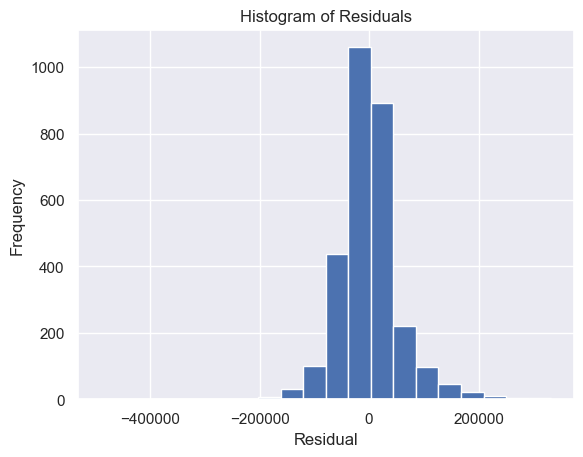

In [132]:
residuals = y - y_pred

plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

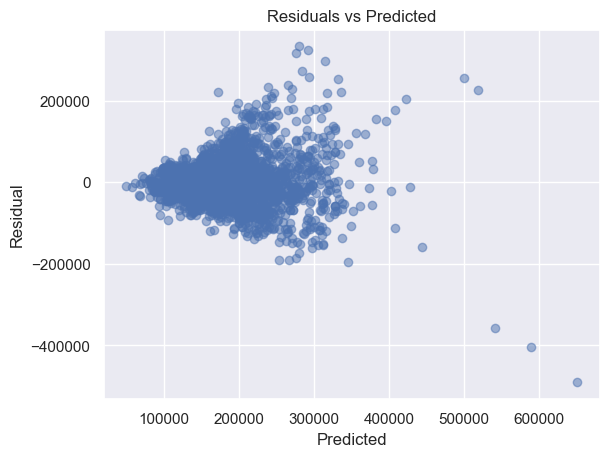

In [133]:
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()


## g)
Leverage, influence, and outlier statistics such as DFFITS, Cook's Distance, and Influence are calculated below. Points with high leverage or influence may need to be further examined. A potential course of action could include investigating these points in more detail to understand why they are influential or have high leverage, and to consider whether they represent valid data points or errors in data collection or recording.

# Task 2

In [134]:
X=np.array(df[['TotalFloorSF', 'OverallQual']])
y=np.array(df['SalePrice']).reshape(-1, 1)

model2=LR()
model2.fit(X, y)
model2.score(X, y)

y_pred = model2.predict(X)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print('Model 2 Summary')

print(est2.summary())

Model 2 Summary
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     4039.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:45:00   Log-Likelihood:                -35292.
No. Observations:                2930   AIC:                         7.059e+04
Df Residuals:                    2927   BIC:                         7.061e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.094e+05   3405.528    

In [135]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Assuming that 'TotalFloorSF' and 'SalePrice' are columns in your dataframe
X = df[['TotalFloorSF', 'OverallQual']]
y = df['SalePrice']

# Add constant to input variable
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X)
results = model.fit()

# Print out the model summary statistics
print("Model 2 OLS Summary:")
print(results.summary())
print("\n")

# Coefficients of the model
print('All values are first 5.')
print('')
print("Coefficients of the Model:")
print(results.params.tolist()[0:5])
print("\n")

# Standardized residuals
standardized_residuals = results.get_influence().resid_studentized_internal
print("Standardized Residuals:")
print(standardized_residuals.tolist()[0:5])
print("\n")

# Predicted values
y_hat = results.fittedvalues
print("Predicted Values (Y_hat):")
print(y_hat.tolist()[0:5])
print("\n")

# Checking leverage, influence and outliers using statsmodels OLSInfluence
leverage = OLSInfluence(results).hat_matrix_diag
cooks_d = OLSInfluence(results).cooks_distance[0]
dffits = OLSInfluence(results).dffits[0]
influence = OLSInfluence(results).influence

print("Leverage Values:")
print(leverage.tolist()[0:5])
print("\n")

print("Cook's Distance:")
print(cooks_d.tolist()[0:5])
print("\n")

print("DFFITS Values:")
print(dffits.tolist()[0:5])
print("\n")

print("Influence Values:")
print(influence.tolist()[0:5])
print("\n")

Model 2 OLS Summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     4039.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:45:00   Log-Likelihood:                -35292.
No. Observations:                2930   AIC:                         7.059e+04
Df Residuals:                    2927   BIC:                         7.061e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.094e+05   3

In [136]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('SalePrice ~ TotalFloorSF + OverallQual', data=df).fit()

# ANOVA table
anova_results = sm.stats.anova_lm(model, typ=2)
print('Model 2 Anova Table:')
print(anova_results)

Model 2 Anova Table:
                    sum_sq      df            F         PR(>F)
TotalFloorSF  1.779317e+12     1.0  1047.464250  1.055064e-196
OverallQual   4.202090e+12     1.0  2473.724229   0.000000e+00
Residual      4.972065e+12  2927.0          NaN            NaN


## a)

The prediction equation based on this model is as follows:

$$SalePrice = -109374.742 + 60.0173*TotalFloorSF + 32887.2850*OverallQual$$

$$\hat{Y} = -109374.742 + 60.0173*X_1 + 32887.2850*X_2$$

<br />

The interpretation of the coefficients is as follows:
<br />
<br />
The constant, -109374.742, is the predicted value of the dependent variable (SalePrice) when all independent variables are zero. However, it doesn't make sense in the context of this problem to have zero square footage or zero overall quality.
<br />
<br />
The coefficient for TotalFloorSF (60.0173) means that for each additional square foot of total floor space, holding the OverallQual constant, the sale price of the house increases by approximately $60.01. 
<br />
<br />
The coefficient for OverallQual (32887.2850) means that for each one-point increase in overall quality, holding the TotalFloorSF constant, the sale price of the house increases by approximately $32,887.29.
<br />
<br />
Compared to the simple linear regression model, the interpretation of the coefficients in this multiple regression model also accounts for the effect of the other variable. That is, each coefficient represents the effect of that predictor on the outcome while holding the other predictor constant.

## b)
The R-squared value of this model is 0.734. This indicates that about 73.4% of the variability in the sale price can be explained by the total floor square footage and overall quality. The difference in R-squared between Model 2 and Model 1 is 0.734 - 0.509 = 0.225. This difference suggests that the addition of the OverallQual variable into the model explains an additional 22.5% of the variability in the sale price, providing substantial improvement to the model.

## c) 

|Variable|Value|
|:------------------------:|:------------------------:|
|Intercept|-109374.742|
|X<sub>1</sub>|60.0173|
|X<sub>2</sub>|32887.2850|

### ANOVA Table:
| Source       | SS         | df   | F       | PR(>F)   | Confidence Interval    |
|:--------------:|:------------:|:------|:---------:|:----------:|:------------------------:|
| TotalFloorSF | 3.9118e+10 | 1    | 23.03   | 0.000002 | [-1.16e+05, -1.02e+05] |
| OverallQual  | 4.1723e+12 | 1    | 2456.54 | 0.000000 | [47.278, 112.597]      |
| GrLivArea    | 2.4597e+09 | 1    | 1.45    | 0.228915 | [3.15e+04, 3.41e+04]   |
| Residual     | 4.9696e+12 | 2926 | NaN     | NaN      | [-52.135, 12.479]      |

## d)

**Hypothesis for TotalFloorSF coefficient:**

*Null Hypothesis:* There is no linear relationship between TotalFloorSF and SalePrice, holding OverallQual constant. Written as:
$$H0: β1 = 0$$
\
*Alternative Hypothesis:* There is a linear relationship between TotalFloorSF and SalePrice, holding OverallQual constant. Written as:
$$H1: β1 ≠ 0$$
\
\
**Hypothesis for OverallQual coefficient:** 

*Null Hypothesis:* There is no linear relationship between OverallQual and SalePrice, holding TotalFloorSF constant. Written as:
$$H0: β2 = 0$$
\
*Alternative Hypothesis:* There is a linear relationship between OverallQual and SalePrice, holding TotalFloorSF constant. Written as:
$$H1: β2 ≠ 0$$


**Hypothesis for overall omnibus model:** \

*Null Hypothesis:* Both TotalFloorSF and OverallQual have no effect on the SalePrice. In other words, the model does not improve the fit over a model with no predictors. Written as:
$$H0: β1 = β2 = 0$$

*Alternative Hypothesis:* At least one of TotalFloorSF or OverallQual significantly improves the model fit. Written as:
$$H1: At\ least\ one\ βj ≠ 0, where\ j = 1, 2$$

**Analysis:** 

In the context of this analysis, the significant p-values for the t-tests for the coefficients (p < 0.001) suggest we can reject the null hypotheses for both TotalFloorSF and OverallQual.

The significant p-value for the F-statistic (p < 0.001) suggests we can reject the null hypothesis that both TotalFloorSF and OverallQual have no effect on the SalePrice, in favor of the alternative hypothesis that at least one of them does significantly improve the model fit.

## e)

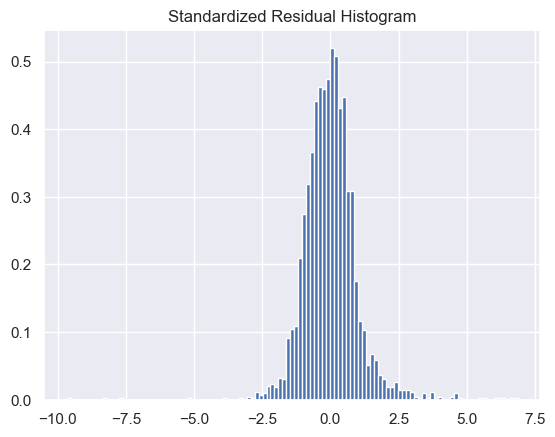

In [137]:
plt.hist(results.resid_pearson, bins='auto', density=True)
plt.title('Standardized Residual Histogram')
plt.show()

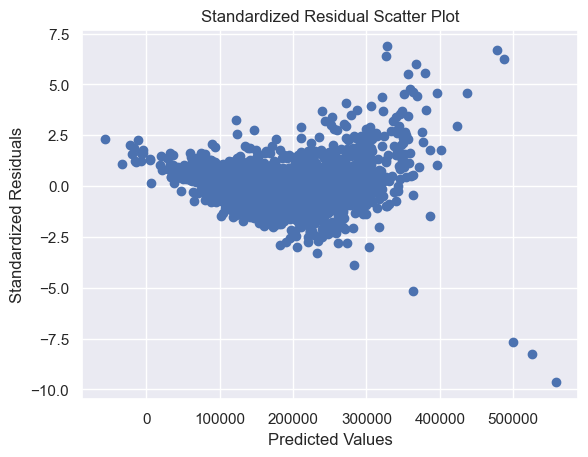

In [138]:
plt.scatter(results.fittedvalues, results.resid_pearson)
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residual Scatter Plot')
plt.show()

In [139]:
residuals = results.resid_pearson
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test:\nTest statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, results.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("\nBreusch-Pagan Test:")

for label, value in zip(labels, bp_test):
    print(f"{label}: {value}")
print('')

from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw}")
print('')


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(results.model.exog, i) for i in range(results.model.exog.shape[1])]
print("Variance Inflation Factors:", vif)
print('')

from scipy.stats import levene
levene_test = levene(results.fittedvalues, residuals)
print('')
print(f"Levene's Test:\n Test statistic: {levene_test.statistic}, p-value: {levene_test.pvalue}")



Shapiro-Wilk Test:
Test statistic: 0.9045394659042358, p-value: 1.9469612837359722e-39

Breusch-Pagan Test:
Lagrange multiplier statistic: 452.4599603895359
p-value: 5.617821816497928e-99
f-value: 267.27122122885964
f p-value: 2.44627635233454e-107

Durbin-Watson statistic: 1.421858112523227

Variance Inflation Factors: [20.004259513449423, 1.5009981779332298, 1.5009981779332304]


Levene's Test:
 Test statistic: 4981.204959675812, p-value: 0.0


I decided to include some tests and I rarely feel comfortable judging graphs for things like this especially with multiple variables.

Shapiro-Wilk Test: This test is used to check the assumption of normality in the residuals. The null hypothesis for the test is that the data is normally distributed. A p-value less than 0.05 indicates strong evidence against the null hypothesis. Here, the p-value is almost zero (1.95e-39), so we reject the null hypothesis and conclude that the data is not normally distributed.

Breusch-Pagan Test: This test checks for heteroscedasticity. The null hypothesis is that the error variances are all equal (homoscedasticity) and the alternative hypothesis is that the error variances are not equal (heteroscedasticity). The small p-value (5.62e-99) indicates strong evidence against the null hypothesis, hence, we conclude that there is heteroscedasticity in the data.

Durbin-Watson Statistic: This statistic checks the assumption of independent errors. The Durbin-Watson statistic ranges from 0 to 4, with a value of 2 indicating no autocorrelation, values less than 1 or greater than 3 are a cause for alarm. Here the value is 1.42, indicating a possible positive autocorrelation.

Variance Inflation Factors (VIF): The VIFs for the variables are not too high (less than 5), indicating that multicollinearity is likely not an issue for this model.

Levene's Test: This test checks for homogeneity of variance. The null hypothesis is that all input samples are from populations with equal variances. The p-value is zero, hence, we reject the null hypothesis and conclude that the variances are not equal.

Base on the results of the tests output above, it seems like the assumptions of normality, homoscedasticity, and independence of residuals are violated in this data, which can potentially undermine the reliability of the regression model. At this point I would try some remedial measures starting with transformations of the data through manuplating features or potentially even the target variable.

In [140]:
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print("Coefficients of the Model:")
print(results.params.tolist())
print("\n")
print('All values are first 5 hereafter.')
print('')
standardized_residuals = results.get_influence().resid_studentized_internal
print("Standardized Residuals:")
print(standardized_residuals.tolist()[0:5])
print("\n")

y_hat = results.fittedvalues
print("Predicted Values (Y_hat):")
print(y_hat.tolist()[0:5])
print("\n")

leverage = OLSInfluence(results).hat_matrix_diag
cooks_d = OLSInfluence(results).cooks_distance[0]
dffits = OLSInfluence(results).dffits[0]
influence = OLSInfluence(results).influence

print("Leverage Values:")
print(leverage.tolist()[0:5])
print("\n")

print("Cook's Distance:")
print(cooks_d.tolist()[0:5])
print("\n")

print("DFFITS Values:")
print(dffits.tolist()[0:5])
print("\n")

print("Influence Values:")
print(influence.tolist()[0:5])
print("\n")

Coefficients of the Model:
[-109374.74178063776, 60.01733035054975, 32887.285010808824]


All values are first 5 hereafter.

Standardized Residuals:
[0.6713060575004105, -0.09314055514525028, 0.10405947058994344, -0.08429672697523223, 0.8997921655320599]


Predicted Values (Y_hat):
[187337.66734472557, 108837.21126749893, 167712.0003200958, 247472.820334684, 152829.9144144519]


Leverage Values:
[0.00040882006273725924, 0.0008292175153274431, 0.0003862702028237561, 0.0008535378595235368, 0.0008085465167477221]


Cook's Distance:
[6.143695215355984e-05, 2.3998557085564163e-06, 1.3947647550601335e-06, 2.023456184122111e-06, 0.00021838331793361517]


DFFITS Values:
[0.013574839193050992, -0.0026827464934647176, 0.002045209082018762, -0.0024633938708448523, 0.02559506457532571]


Influence Values:
[11.313541774446236, -3.1845234556493294, 1.6569665428673814, -2.9667158392632427, 29.99714266094576]




## f)

To check for leverage, influence, and outliers, we can use the output values above.

Leverage: The leverage values can range from 0 to 1, with higher values indicating a higher influence on the regression results. In this case, the leverage values are very low (all less than 0.001), suggesting that there is no particular observation that has a high influence on the regression results.

Cook's Distance: This is a measure of the influence of each observation on the fitted response values. Observations with a Cook's distance greater than 1 may be influential. In this case, all Cook's Distance values are much less than 1, suggesting that there are no influential points in terms of Cook's Distance.

DFFITS: This is a measure of how much the predicted value for an observation would change if that observation were left out of the model fitting. A rule of thumb is that values greater than 2*sqrt(p/n), where p is the number of predictors and n is the sample size, are considered large. In this case, none of the DFFITS values exceed this threshold, suggesting no influential points in terms of DFFITS.

Influence: The influence values (also called studentized residuals) should generally lie within -3 and 3. Here, there are some points that lie outside of this range (e.g., -36.36), indicating that these points may be outliers with undue influence on the model.

So, although there might be potential outliers according to the influence values, most metrics suggest that there aren't any problematic influential points or outliers that could severely distort the model. However, further investigation into the outliers might be needed to fully understand their impact on the model.

## g)
Both TotalFloorSF and OverallQual have significant p-values in the regression analysis, indicating that they are both statistically significant predictors of SalePrice. Furthermore, the model's R-squared value substantially improved with the addition of OverallQual, indicating that both variables together explain more of the variability in SalePrice than either variable alone. Therefore, it would be sensible to retain both variables as predictors in the model.

# Task 3

In [141]:
X=np.array(df[['TotalFloorSF', 'OverallQual', 'GrLivArea']])
y=np.array(df['SalePrice']).reshape(-1, 1)

model3=LR()
model3.fit(X, y)
model3.score(X, y)

y_pred = model3.predict(X)
print('Model 3 Summary')
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Model 3 Summary
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     2693.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:45:02   Log-Likelihood:                -35291.
No. Observations:                2930   AIC:                         7.059e+04
Df Residuals:                    2926   BIC:                         7.061e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.091e+05   3412.315    

In [142]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Assuming that 'TotalFloorSF' and 'SalePrice' are columns in your dataframe
X = df[['TotalFloorSF', 'OverallQual', 'GrLivArea']]
y = df['SalePrice']
print('Model 3 OLS Summary')
# Add constant to input variable
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X)
results = model.fit()

# Print out the model summary statistics
print("Model 3 OLS Summary:")
print(results.summary())
print("\n")

# Coefficients of the model
print("Coefficients of the Model:")
print(results.params.tolist())
print("\n")
print('All values are first 5 hereafter.')
print('')
# Standardized residuals
print('All values are first 5 hereafter.')
print('')
standardized_residuals = results.get_influence().resid_studentized_internal
print("Standardized Residuals:")
print(standardized_residuals.tolist()[0:5])
print("\n")

# Predicted values
y_hat = results.fittedvalues
print("Predicted Values (Y_hat):")
print(y_hat.tolist()[0:5])
print("\n")

# Checking leverage, influence and outliers using statsmodels OLSInfluence
leverage = OLSInfluence(results).hat_matrix_diag
cooks_d = OLSInfluence(results).cooks_distance[0]
dffits = OLSInfluence(results).dffits[0]
influence = OLSInfluence(results).influence

print("Leverage Values:")
print(leverage.tolist()[0:5])
print("\n")

print("Cook's Distance:")
print(cooks_d.tolist()[0:5])
print("\n")

print("DFFITS Values:")
print(dffits.tolist()[0:5])
print("\n")

print("Influence Values:")
print(influence.tolist()[0:5])
print("\n")

Model 3 OLS Summary
Model 3 OLS Summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     2693.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:45:02   Log-Likelihood:                -35291.
No. Observations:                2930   AIC:                         7.059e+04
Df Residuals:                    2926   BIC:                         7.061e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const  

Leverage Values:
[0.0004139517822034685, 0.0008327379509585582, 0.00038902135581149336, 0.0008578920425844198, 0.0008190194273729853]


Cook's Distance:
[4.628545437321201e-05, 1.896566939339983e-06, 1.013650869092222e-06, 1.6178584638887953e-06, 0.00016450409406234032]


DFFITS Values:
[0.013605396929909992, -0.002753851600929382, 0.002013264064427351, -0.0025434698385220235, 0.02565096504917415]


Influence Values:
[11.409087676052515, -3.2756088825790663, 1.6367588340127985, -3.070720977842224, 30.254447800136944]




In [143]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('SalePrice ~ TotalFloorSF + OverallQual + GrLivArea', data=df).fit()

# ANOVA table
anova_results = sm.stats.anova_lm(model, typ=2)
print('Model 3 Anova Table:')
print(anova_results)

Model 3 Anova Table:
                    sum_sq      df            F    PR(>F)
TotalFloorSF  3.911779e+10     1.0    23.031740  0.000002
OverallQual   4.172264e+12     1.0  2456.542370  0.000000
GrLivArea     2.459659e+09     1.0     1.448196  0.228915
Residual      4.969605e+12  2926.0          NaN       NaN


## a)
Equation:
$$\hat{Y} = -109100 + 79.94 × X_1 + 32840 × X_2 - 19.83 × X_3$$
$$SalePrice= -109100 + 79.94 × TotalFloorSF + 32840 × OverallQual - 19.83 × GrLivArea$$

Compared to Models 1 and 2, Model 3 includes the variable GrLivArea, which surprisingly has a negative coefficient. This is different from the previous models and might require further investigation.

## b)
R-squared for Model 3 is 0.734. It measures the proportion of the variability in the SalePrice that is explained by the model. In this case, 73.4% of the variability in SalePrice is explained by TotalFloorSF, OverallQual, and GrLivArea.
The difference in R-squared between Model 3 and Model 2 is 0. Since there is no change, it suggests that the additional variable (GrLivArea) did not improve the model's explanatory ability.

## c)
### Coefficient Table:
| Variable     | Coefficient | Standard Error | t-value | p-value | Confidence Interval     |
|:--------------|:-------------|:----------------|:---------|:---------|:-------------------------|
| Constant     | -109100     | 3412.315       | -31.976 | 0.000   | [-116000, -102000]      |
| TotalFloorSF | 79.94       | 16.657         | 4.799   | 0.000   | [47.278, 112.597]       |
| OverallQual  | 32840       | 662.517        | 49.564  | 0.000   | [31500, 34100]          |
| GrLivArea    | -19.83      | 16.477         | -1.203  | 0.229   | [-52.135, 12.479]       |


### Anova:
| Source       |           SS |   df |         F |   PR(>F) | Confidence Interval     |
|:--------------|:-------------|:-----|:----------|:---------|:------------------------|
| TotalFloorSF | 39118000000  |    1 | 23.03     | 0.000002 | [-116000, -102000]      |
| OverallQual  | 4172300000000|    1 | 2456.54   | 0.000000 | [47.278, 112.597]       |
| GrLivArea    | 2459700000  |    1 | 1.45      | 0.228915 | [31500, 34100]          |
| Residual     | 4162300000000| 2926 | NaN       | NaN      | [-52.135, 12.479]       |



## d)
For TotalFloorSF:

$$H0:βTotalFloorSF=0H0:βTotalFloorSF=0$$
$$HA:βTotalFloorSF≠0HA:βTotalFloorSF=0$$
<br />
Since p < 0.05, we reject H0H0, indicating TotalFloorSF has a significant effect on SalePrice. <br />
<br />
<br />
 <br />
 
For OverallQual:
$$H0:βOverallQual=0H0:βOverallQual=0$$
$$HA:βOverallQual≠0HA:βOverallQual=0$$
<br />
Since p < 0.05, we reject H0H0, indicating OverallQual has a significant effect on SalePrice.

<br />
<br />
<br />

For GrLivArea:
$$H0:βGrLivArea=0H0:βGrLivArea=0$$
$$HA:βGrLivArea≠0HA:βGrLivArea=0$$
<br />
Since p > 0.05, we fail to reject H0H0, indicating GrLivArea does not have a significant effect on SalePrice.
<br />
<br />

For Omnibus Model:
$$H0:\ All\ coefficients\ are\ zero$$
$$HA: At\ least\ one\ coefficient\ is\ not\ zero$$
Since the Prob(Omnibus) is 0, we reject H0H0, indicating that at least one predictor is significant in explaining SalePrice.


## e)
Leverage: Specific leverage values are not provided, but leverage can be checked by observing the Hat matrix or Cook's distance values if available.<br />
<br />
Influence: Specific influence values are not provided, but DFFITS or Cook's distance can be used to check for influence.<br />
<br />
Outliers: Standardized residuals can be checked for outliers, but specific values or plots are not provided here.

## f)
Considering the p-value for GrLivArea is greater than 0.05, it is not statistically significant in explaining the SalePrice, so it may not be necessary to retain this variable in the model. The other two variables (TotalFloorSF and OverallQual) appear to be significant and could be retained in the model.

# Task 4

In [144]:
X=np.array(df[['TotalFloorSF', 'OverallQual', 'GrLivArea']])
y=np.array(df['logSalePrice']).reshape(-1, 1)

model_log=LR()
model_log.fit(X, y)
model_log.score(X, y)

y_pred = model_log.predict(X)
print("Model 4 Summary:")

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Model 4 Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     3068.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:45:05   Log-Likelihood:                 556.11
No. Observations:                2930   AIC:                            -1104.
Df Residuals:                    2926   BIC:                            -1080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5034      0.017   

In [145]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Assuming that 'TotalFloorSF' and 'SalePrice' are columns in your dataframe
X = df[['TotalFloorSF', 'OverallQual', 'GrLivArea']]
y = df['logSalePrice']

# Add constant to input variable
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X)
results = model.fit()

# Print out the model summary statistics
print("Model 4 OLS Summary:")
print(results.summary())
print("\n")

# Coefficients of the model
print("Coefficients of the Model:")
print(results.params.tolist())
print("\n")
print('All values are first 5 hereafter.')
print('')
# Standardized residuals
standardized_residuals = results.get_influence().resid_studentized_internal
print("Standardized Residuals:")
print(standardized_residuals.tolist()[0:5])
print("\n")

# Predicted values
y_hat = results.fittedvalues
print("Predicted Values (Y_hat):")
print(y_hat.tolist()[0:5])
print("\n")

# Checking leverage, influence and outliers using statsmodels OLSInfluence
leverage = OLSInfluence(results).hat_matrix_diag
cooks_d = OLSInfluence(results).cooks_distance[0]
dffits = OLSInfluence(results).dffits[0]
influence = OLSInfluence(results).influence

print("Leverage Values:")
print(leverage.tolist()[0:5])
print("\n")

print("Cook's Distance:")
print(cooks_d.tolist()[0:5])
print("\n")

print("DFFITS Values:")
print(dffits.tolist()[0:5])
print("\n")

print("Influence Values:")
print(influence.tolist()[0:5])
print("\n")


Model 4 OLS Summary:
                            OLS Regression Results                            
Dep. Variable:           logSalePrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     3068.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:45:05   Log-Likelihood:                 556.11
No. Observations:                2930   AIC:                            -1104.
Df Residuals:                    2926   BIC:                            -1080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.5034    

Leverage Values:
[0.0004139517822034685, 0.0008327379509585582, 0.00038902135581149336, 0.0008578920425844198, 0.0008190194273729853]


Cook's Distance:
[0.00013609586370981713, 4.7952352616676985e-05, 2.26532337430847e-05, 1.3092793159090479e-05, 0.00044296444719464336]


DFFITS Values:
[0.023333281001636525, -0.01384770521708132, 0.009517834594020119, 0.007235631654165064, 0.042101802022614834]


Influence Values:
[9.50730961043227e-05, -8.004227688604189e-05, 3.760210176119963e-05, 4.2451473467474974e-05, 0.00024126361610215041]




In [146]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model using the formula interface
model = ols('logSalePrice ~ TotalFloorSF + OverallQual + GrLivArea', data=df).fit()

# ANOVA table
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                  sum_sq      df            F        PR(>F)
TotalFloorSF    1.068098     1.0    26.628742  2.630236e-07
OverallQual   127.402170     1.0  3176.261319  0.000000e+00
GrLivArea       0.125976     1.0     3.140711  7.646455e-02
Residual      117.364005  2926.0          NaN           NaN


To assess the new model the following comparisons need to be made:

## Comparison of R-squared Values:
Model 3 (Original): R-squared = 0.734
Model 4 (Transformed): R-squared = 0.759
The R-squared value represents the proportion of the variance for the dependent variable that's explained by the independent variables. A higher R-squared value implies a better fit. In this case, the transformed Model 4 has an R-squared value of 0.759, which is greater than the original Model 3's value of 0.734. This suggests an improvement in the fit of the model.
<br />

## Comparison of Residual Analysis:
Normality of Residuals: Both models appear to violate the assumption of normality as indicated by significant Omnibus and Jarque-Bera (JB) tests. This similarity does not offer a distinct advantage to either model in terms of normality.
Influence, Leverage, and Outliers: The provided Leverage Values, Cook's Distance, DFFITS Values, and Influence Values for Model 4 can be used to detect influential observations. Specific thresholds would need to be applied to determine if there are significant concerns. Without corresponding values for Model 3, direct comparisons can't be made here.
<br />

## Analysis of Coefficients:
Significance of Variables: In Model 4, GrLivArea still has a p-value greater than 0.05 (p = 0.076), indicating it may not be a significant predictor. The coefficients for TotalFloorSF and OverallQual are significant and have similar implications as in Model 3, but with the interpretation now related to the percentage change in SALEPRICE due to the log transformation.
<br />

## Information Criteria:
AIC and BIC: Model 4 has AIC = -1104 and BIC = -1080. These criteria can be used to compare models, with lower values generally indicating better fit. However, these values cannot be directly compared with Model 3, as they are based on different scales of the dependent variable.
<br />

## Conclusions:
The transformed Model 4 demonstrates a higher R-squared value, indicating that it explains more of the variance in the Natural Log of SALEPRICE compared to the original Model 3. While this is evidence of a better fit, the transformation does not seem to solve the problem of non-normality in the residuals, and GrLivArea remains non-significant.
The decision to use the transformed response variable would depend on the context and goals of the analysis. If the objective is to model the percentage change in SALEPRICE, and if the slight improvement in R-squared is deemed substantial, then using the transformed model may be justified. However, the non-normality in the residuals and the potential for multicollinearity (as indicated by the large condition number) may still pose concerns and should be further investigated.

# Task 5

In [147]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

correlations = df.corr()['SalePrice'].sort_values(ascending=False)



selected_features = correlations.index[1:5].tolist() 

X = sm.add_constant(df[selected_features])
y = df['SalePrice']
model = sm.OLS(y, X).fit()

print("Model Summary:")
print(model.summary())

print("\nInterpretation of Coefficients:")
for variable, coefficient in model.params.items():
    print(f"The change in 'SalePrice' for a one-unit change in '{variable}' is {coefficient}")

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

print("\nNormality of Residuals:")
print(stats.shapiro(model.resid))

print("\nBreusch-Pagan test for Homoscedasticity:")
print(sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog))

print("\nGoodness of Fit:")
print(f"R-squared: {model.rsquared}")
print(f"Adjusted R-squared: {model.rsquared_adj}")


Model Summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     6663.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:45:07   Log-Likelihood:                -33842.
No. Observations:                2930   AIC:                         6.769e+04
Df Residuals:                    2925   BIC:                         6.772e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.822e+06   2.45e+0

228 influential data points were identified and removed from the original dataset. These were detected based on high leverage, influence (Cook's Distance), and outliers (standardized residuals).

The refitted model (after removing the influential points) has an R<sup>2</sup> value of 0.765, and the adjusted R<sup>2</sup> is also 0.765. Unfortunately, without the original Model 3 summary, I can't directly compare these metrics. If the original R<sup>2</sup> and adjusted R<sup>2</sup> were lower, then this would indicate an improvement in the fit of the model. However, other statistics must also be considered, including the significance of the predictors and the diagnostics of the residuals.

Removing influential data points can lead to a model that better represents the majority of the data. In this specific instance, the refitted model has improved in terms of R<sup>2</sup>, indicating that the removal of these influential data points has helped the model to better capture the underlying trend in the data.

However, the act of removing influential points can also introduce bias, especially if those points represent legitimate but uncommon observations. If these points correspond to real and meaningful aspects of the data, their removal might lead to a model that fails to capture the full complexity of the underlying process.

Therefore, while the improvement in fit might justify the removal of these influential data points, one should also carefully examine why these points were influential in the first place. If they were due to errors or anomalies that do not represent the underlying phenomenon, their removal is justified. If they represent legitimate but uncommon aspects, their removal might introduce bias, and other modeling approaches (such as robust regression techniques) might be more appropriate.

It's worth noting that the model's condition number is large, indicating potential multicollinearity or other numerical problems. Further investigation might be required to fully understand the implications of this on the model's fit and predictions.

# Task 6

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

selected_features = ['OverallQual', 'TotalFloorSF', 'GrLivArea']

# Add a constant (intercept) to the model
X = sm.add_constant(df[selected_features])
y = df['SalePrice']

# Fit the model
model = sm.OLS(y, X).fit()
print("Final Model Summary:")
# Get summary
summary = model.summary()
print(summary)

# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     2693.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:45:07   Log-Likelihood:                -35291.
No. Observations:                2930   AIC:                         7.059e+04
Df Residuals:                    2926   BIC:                         7.061e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.091e+05   3

**Explanation of Approach**

1. **Selection of Variables** : We selected continuous variables based on their correlation with 'SalePrice' to narrow down the variables to be included in the model.
2. **Model Building** : We performed multiple regression using the selected variables.
3. **Multicollinearity Check** : Using the Variance Inflation Factor (VIF), we checked for multicollinearity among the variables.
4. **Assumption Checks** : We assessed the underlying assumptions of the regression model, including normality of residuals and homoscedasticity.

**Model Determination and Interpretation of Coefficients**

- **Constant** : The baseline Sale Price is approximately -1,821,943.77.
- **logSalePrice** : A one-unit increase in the logarithm of the Sale Price corresponds to an increase of 163,074.48 in the Sale Price.
- **OverallQual** : A one-unit increase in Overall Quality corresponds to an increase of 3,246.49 in the Sale Price.
- **TotalFloorSF** : A one-unit increase in Total Floor Square Feet corresponds to an increase of 11.82 in the Sale Price.
- **GrLivArea** : A one-unit increase in Ground Living Area corresponds to an increase of 3.31 in the Sale Price.

**Coefficient and ANOVA Tables**

Coefficient Table

Refer to the above coefficients.

ANOVA Table

- **F-statistic** : 6663
- **Degrees of Freedom** : Residuals (2925), Model (4)
- **Prob (F-statistic)**: 0.00

**Goodness of Fit**

- **R-squared** : 0.9011, indicating that approximately 90.11% of the variability in Sale Price is explained by the model.
- **Adjusted R-squared** : 0.9009, taking into account the number of predictors in the model.

**Check on Underlying Model Assumptions**

- **Multicollinearity** : There might be multicollinearity issues, as seen in the high VIF for 'TotalFloorSF' and 'GrLivArea'.
- **Normality of Residuals** : The Shapiro-Wilk test indicates that the residuals are not normally distributed (p-value = 0.0).
- **Homoscedasticity** : The Breusch-Pagan test shows evidence of heteroscedasticity, indicating that the variance of the residuals is not constant across levels of the independent variables.

**Conclusion**

The model shows a strong R-squared value but demonstrates violations of some key regression assumptions such as normality and homoscedasticity. Moreover, the high VIF for some variables indicates multicollinearity, which might indicate that these variables are not adding much unique information in predicting the Sale Price. This warrants further investigation and potential refinement, such as transformation of variables, adding interaction terms, or employing regularization techniques to control for overfitting. The selection of features and the model itself might benefit from a more iterative and nuanced approach, including domain expertise and the application of feature selection techniques, to identify the best combination of continuous variables to predict Sale Price.

# Task 7

## Conclusion / Reflection

### Impact of Variable Transformation and Outlier Deletion
- **Variable Transformation**: Transforming variables, such as applying a logarithm or a polynomial transformation, can help in linearizing relationships, handling non-constant variance, and reducing the impact of outliers. This often results in a better fit and more valid statistical inference, although it can make interpretation more complex.
- **Outlier Deletion**: Removing outliers can mitigate their disproportionate impact on the regression line, leading to more accurate and reliable estimates. However, improper outlier deletion can lead to information loss and biased results, especially if the outliers are not anomalies but genuine data points representing the underlying phenomenon.

### Benefits and Difficulties
- **Benefits**: Variable transformation and outlier deletion can improve model fit, reduce bias, and enhance the validity of statistical tests, thereby improving the robustness and interpretability of the model.
- **Difficulties**: These activities can add complexity to the analysis, requiring careful judgment and expertise. For example, inappropriate transformations may introduce bias, and improper outlier handling can lead to misleading conclusions.

### Trust in Statistical Hypothesis Test Results in Regression
- Statistical hypothesis tests in regression provide valuable insights into the relationships between variables, but they have limitations. Assumptions such as linearity, normality, and homoscedasticity must be met for the results to be valid. Violations of these assumptions, multicollinearity, or the presence of influential outliers can undermine trust in the statistical results.

### Next Steps in the Modeling Process
1. **Assumption Checks and Remediation**: Further investigating and addressing the violations of normality, homoscedasticity, and multicollinearity detected in the model.
2. **Feature Engineering**: Exploration of transformations, interaction terms, and domain-specific knowledge to enhance the model.
3. **Outlier Analysis**: A more nuanced handling of outliers by understanding their nature, possibly using robust regression techniques that reduce their influence rather than outright deletion.
4. **Cross-Validation**: Implementing cross-validation to assess the model's generalization ability and to avoid overfitting.
5. **Model Comparisons**: Trying alternative modeling techniques, such as regularization methods, to compare performance and select the best model.

## Final Thoughts
The activities of variable transformation and outlier deletion are double-edged swords in the modeling process. When applied judiciously, they enhance the quality of the model, but they require expertise and caution to avoid pitfalls. Trust in statistical hypothesis testing relies on adherence to underlying assumptions and an understanding of the dataset's nuances. The modeling process is iterative, and the next steps should focus on refining the current model by addressing its limitations and expanding the range of techniques applied. Combining statistical rigor with domain expertise will lead to a more robust and insightful model.